# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer:  The aim for this project is to determine if we can make reasonable predictions of grad school admissions based on GRE, GPA and schook rank data. 

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: 

The data included observations of GRE scores, GPA, and school rank, and whether or not the student was admitted to the grad school. 

We dropped observations (rows) with data NA in columns. 
We transformed categorical data of school rank into dummy variables. 

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

In [39]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [40]:
mean_gre_admitted = df[(df['admit'] != 0)]['gre'].mean()
print mean_gre_admitted

mean_gre_not_admitted = df[(df['admit'] != 1)]['gre'].mean()
print mean_gre_not_admitted

618.571428571
573.579335793


In [41]:
mean_gpa_admitted = df[df['admit'] != 0]['gpa'].mean()
print mean_gpa_admitted

mean_gpa_not_admitted = df[df['admit'] != 1]['gpa'].mean()
print mean_gpa_not_admitted

3.48920634921
3.34715867159


In [42]:
not_admitted_prestige = df.loc[df['admit'] == 0]['prestige'].value_counts(normalize=True)
not_admitted_prestige

2.0    0.350554
3.0    0.343173
4.0    0.202952
1.0    0.103321
Name: prestige, dtype: float64

In [43]:
admitted_prestige = df.loc[df['admit'] == 1]['prestige'].value_counts(normalize=True)
admitted_prestige

2.0    0.420635
1.0    0.261905
3.0    0.222222
4.0    0.095238
Name: prestige, dtype: float64

In [44]:
columns = ['Not Admitted', 'Admitted']
rows = ['GPA', 'GRE', 'Prestige 1', 'Prestige 2', 'Prestige 3', 'Prestige 4']
data = [[mean_gpa_not_admitted, mean_gpa_admitted], 
        [mean_gre_not_admitted, mean_gre_admitted], 
        [not_admitted_prestige[1.0], admitted_prestige[1.0]], 
        [not_admitted_prestige[2.0], admitted_prestige[2.0]], 
        [not_admitted_prestige[3.0], admitted_prestige[3.0]], 
        [not_admitted_prestige[4.0], admitted_prestige[4.0]]]

pd.DataFrame(data, index=rows, columns=columns)

,Not Admitted,Admitted
GPA,3.347159,3.489206
GRE,573.579336,618.571429
Prestige 1,0.103321,0.261905
Prestige 2,0.350554,0.420635
Prestige 3,0.343173,0.222222
Prestige 4,0.202952,0.095238


### Methods: Write up the methods used in your analysis

Answer:
1. Preprocessing - drop or impute observations with missing data.
2. Exploratory Analysis - use .describe() method to view statistics related to the data.
3. Plot histograms of the variables to view distribution. Look at skewness and kurtosis and correct shape using a transformation.
4. Look for colinearity (correlation) and remove any that might be too closely correlated.
5. Create dummies of categorical data and calculate odds ratio.

### Results: Write up your results

Answer:
4. None of the variables were closely correlated (none were -1 or 1) so we kept them all.
5. Prestige 2 has lower odds of being admitted than Prestige 1.

So we can draw some conclusions from the data that might be helpful in figuring out if someone will be admitted or not. 

### Visuals: Provide a table or visualization of these results

In [53]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


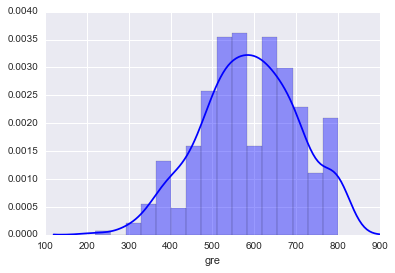

In [47]:
sns.distplot(df['gre'], color ='b')

### Discussion: Write up your discussion and future steps

Answer: 

Future steps would involve creating a linear regression model to make predictions based on historical data.

>**Comments:** not totally sure what you mean ...

## Feedback

Nice work!


| Requirements | Incomplete (0) | Does Not Meet Expectations (1) | Meets Expectations (2) | Exceeds Expectations (3) |
|---|---|---|---|---|
| Outlined methods and models | | |X | |
| Articulation of "specific aim" and datasets | | |X | |
| Risks and assumptions | | |X | |
| Goals and criteria for success | | |X | |
| Exploratory data analysis overview with visualizations and statistical analysis | | |X | |
| Writeup with interpretation of findings, an executive summary, conclusions, and next steps | | |X | |